In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from funcs import addMeanAndStdDev
from funcs_plotter import scatterplotWithErrors, scatterplotColored
import numpy as np

# RBF

In [86]:
df = pd.read_csv("hyperParamOpt/jobsOutput/RBF/hyperParOptResults2.csv", index_col=0)
df = addMeanAndStdDev(df)

In [73]:
df[df.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight


In [85]:
df[df['C_class']==1000000].iloc[:,-15:]#the parameters optimizaed for tracking was (c=10**6, gamma=1, weight=none)

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '1000000.0', 'scale', 'None')",3837.646170,984.131555,0.970585,0.008349,0.956802,0.007117,0.93396,0.011113,0.008602,0.007439,0.011899,RBF,1000000.0,scale,None
"('RBF', '1000000.0', 'auto', 'None')",281.741128,52.479033,0.980165,0.005127,0.962864,0.006821,0.94288,0.010906,0.005230,0.007084,0.011566,RBF,1000000.0,auto,None
"('RBF', '1000000.0', '1', 'None')",2743.011165,311.169642,0.973579,0.003824,0.959578,0.005874,0.93796,0.009357,0.003928,0.006122,0.009976,RBF,1000000.0,1,None
"('RBF', '1000000.0', '1', 'Balanced')",3191.387099,1140.098077,0.971645,0.006492,0.951345,0.006030,0.92712,0.008481,0.006682,0.006339,0.009148,RBF,1000000.0,1,Balanced
"('RBF', '1000000.0', 'scale', 'Balanced')",5043.786844,969.288595,0.970608,0.005295,0.949172,0.009242,0.92404,0.012553,0.005456,0.009737,0.013585,RBF,1000000.0,scale,Balanced
"('RBF', '1000000.0', 'auto', 'Balanced')",281.852699,61.041271,0.979643,0.004689,0.951214,0.009046,0.92744,0.012350,0.004787,0.009510,0.013316,RBF,1000000.0,auto,Balanced


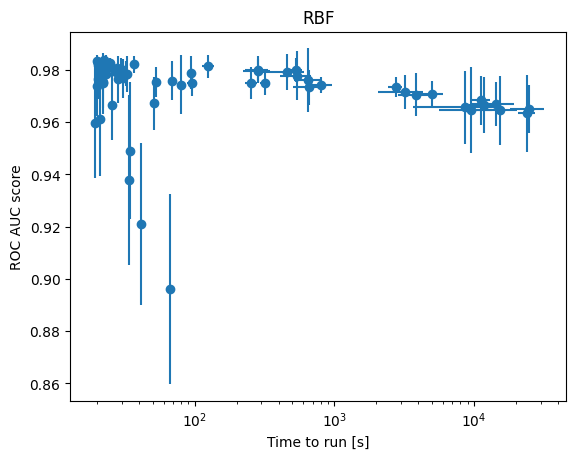

In [65]:
scatterplotWithErrors(x=df['TimeToRun-mean'], y=df["rocAUC-mean"], x_err=df['TimeToRun-std'], y_err=df["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='RBF')

In [71]:
list(df['weight'].unique())

['Balanced', 'None']

In [5]:
decreasingColorDarkness={100000000: "#F8D1CC",
10000000: "#F3BFB7",
1000000: "#EEA8A1",
100000: "#E9918C",
10000: "#E47A76",
1000: "#DF6261",
100: "#DA4B4B",
10: "#D53F3F",
1: "#CF3333",
0.1: "#C92828"}

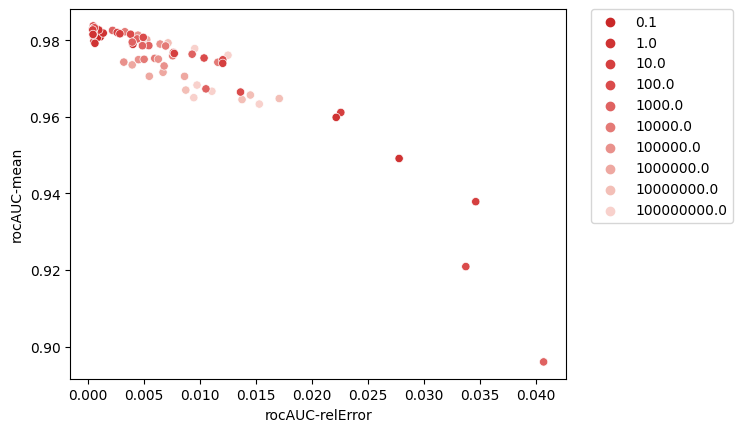

In [6]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df, palette=decreasingColorDarkness, legendOutsideGraph=True)

In [7]:
df2 = df[df['C_class']<10**6]

In [8]:
decreasingColorDarkness2={100000: "#E9918C",
10000: "#E47A76",
1000: "#DF6261",
100: "#DA4B4B",
10: "#D53F3F",
1: "#CF3333",
0.1: "#C92828"}

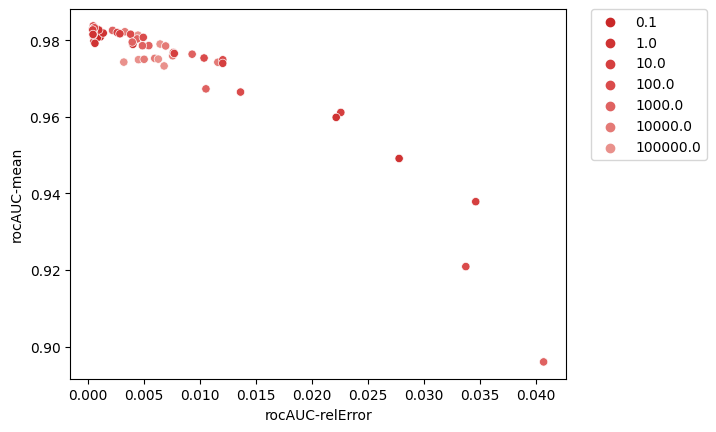

In [9]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df2, palette=decreasingColorDarkness2, legendOutsideGraph=True)

In [10]:
multicolors = {0.1: "#1f77b4",
1.0: "#ff7f0e",
10: "#2ca02c",
100: "#d62728",
1000: "#9467bd",
10000: "#8c564b",
100000: "#e377c2"}

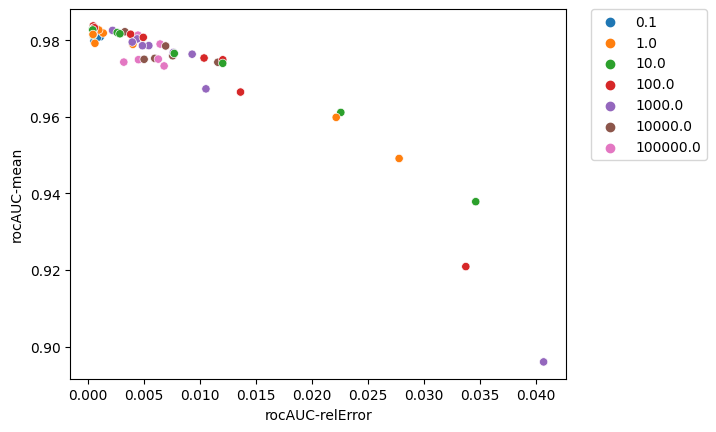

In [11]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df2, palette=multicolors, legendOutsideGraph=True)

In [12]:
multicolors2 = {0.1: "#1f77b4",
1.0: "#ff7f0e",
10: "#2ca02c",
100: "#d62728",
1000: "#9467bd",
10000: "#8c564b",
100000: "#e377c2",
1000000: "#7f7f7f",
10000000: "#bcbd22",
100000000: "#17becf"}

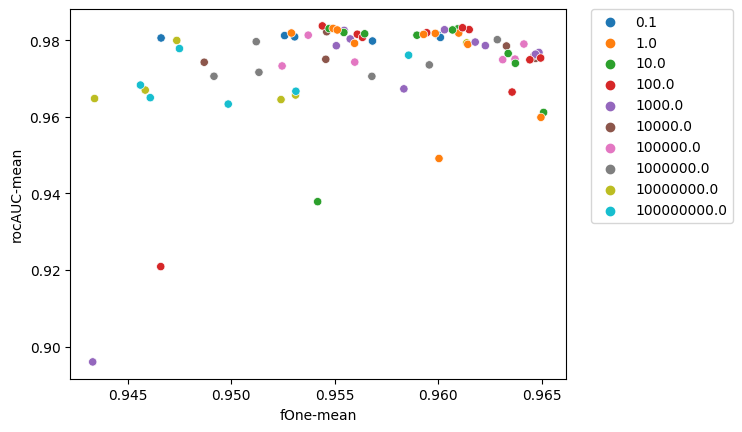

In [13]:
scatterplotColored(x="fOne-mean", y="rocAUC-mean", hue="C_class", data=df, palette=multicolors2, legendOutsideGraph=True)


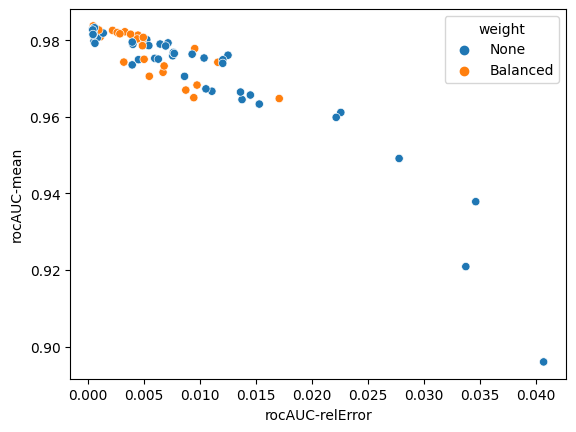

In [14]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="weight", data=df, palette=None, legendOutsideGraph=False)


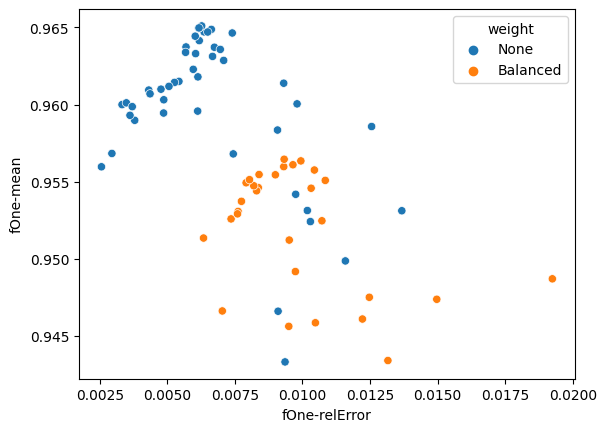

In [15]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="weight", data=df, palette=None, legendOutsideGraph=False)


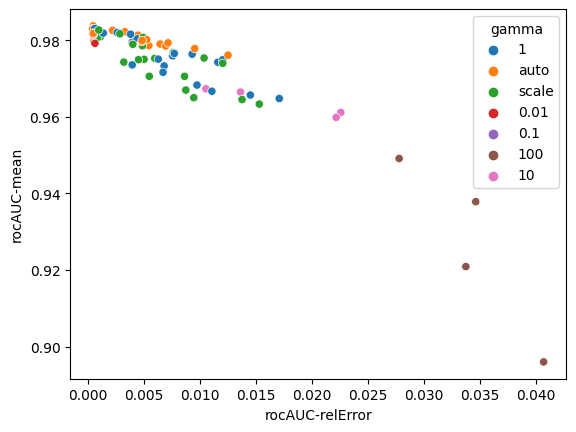

In [87]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="gamma", data=df, palette=None, legendOutsideGraph=False)


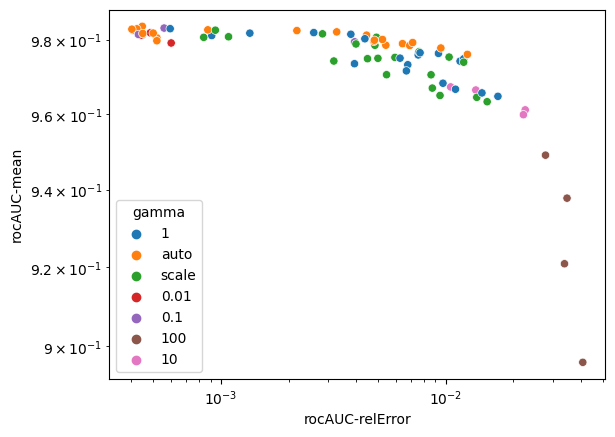

In [88]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="gamma", data=df, palette=None, legendOutsideGraph=False, loglog=True)


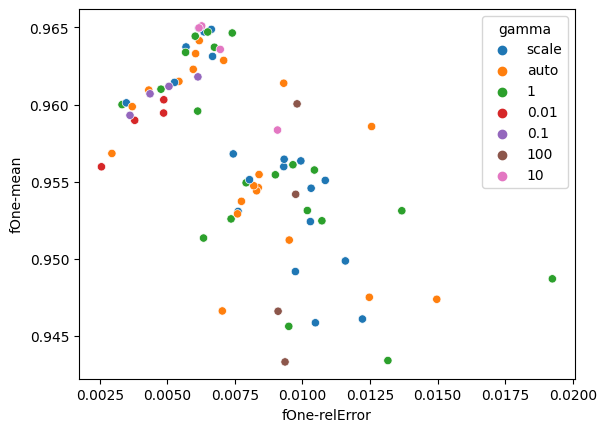

In [17]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="gamma", data=df, palette=None, legendOutsideGraph=False)


# Sigmoid

In [19]:
df_sig = pd.read_csv("hyperParamOpt/jobsOutput/sigmoid/hyperParOptResults2.csv", index_col=0)
df_sig = addMeanAndStdDev(df_sig)

In [20]:
df_sig[df_sig.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight


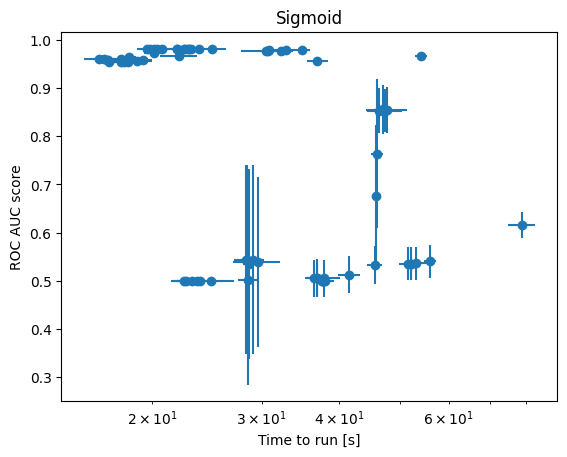

In [74]:
scatterplotWithErrors(x=df_sig['TimeToRun-mean'], y=df_sig["rocAUC-mean"], x_err=df_sig['TimeToRun-std'], y_err=df_sig["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Sigmoid')


In [9]:
decreasingColorDarkness3={10000: "#F8D1CC",
1000: "#EEA8A1",
100: "#E9918C",
10: "#DF6261",
1: "#CF3333",
0.1: "#C92828"}

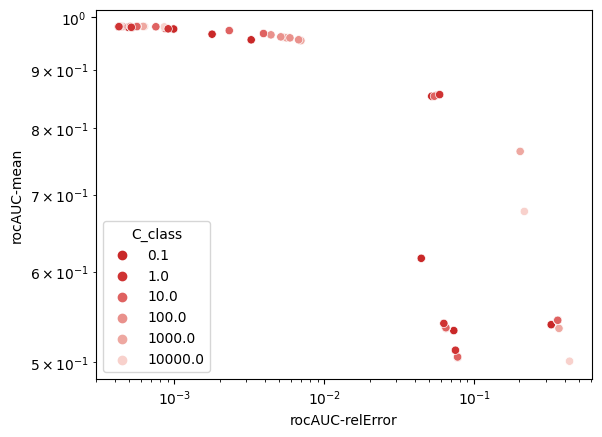

In [11]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df_sig, palette=decreasingColorDarkness3, legendOutsideGraph=False, loglog=True)


# Poly

In [36]:
df_poly = pd.read_csv("hyperParamOpt/jobsOutput/poly/hyperParOptResults2.csv", index_col=0)
df_poly = addMeanAndStdDev(df_poly)

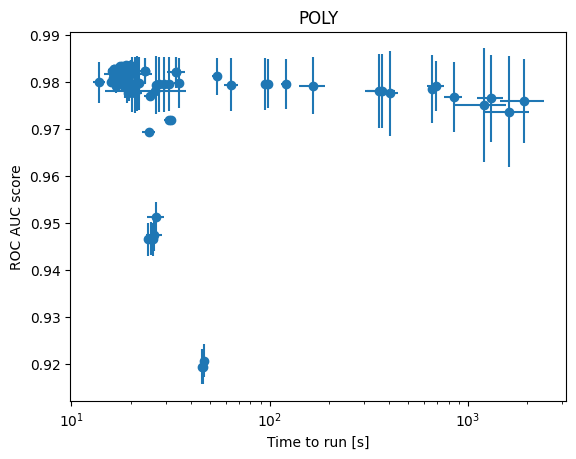

In [37]:
scatterplotWithErrors(x=df_poly['TimeToRun-mean'], y=df_poly["rocAUC-mean"], x_err=df_poly['TimeToRun-std'], y_err=df_poly["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score',title='POLY')


In [40]:
df_poly['gamma'].unique()

array(['0.01', '0.1', '10', '1', 'auto', 'scale', '0.5', '2'],
      dtype=object)

# compare

In [ ]:
df_rbf = pd.read_csv("hyperParamOpt/jobsOutput/RBF/hyperParOptResults2.csv", index_col=0)
df_rbf = addMeanAndStdDev(df_rbf)
df_rbf = df_rbf[df_rbf['rocAUC-mean']>0.983]
df_rbf = df_rbf[df_rbf['TimeToRun-mean']<50]

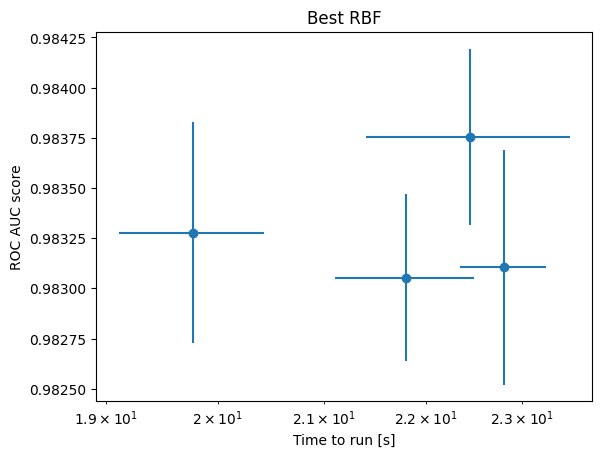

In [ ]:
scatterplotWithErrors(x=df_rbf['TimeToRun-mean'], y=df_rbf["rocAUC-mean"], x_err=df_rbf['TimeToRun-std'], y_err=df_rbf["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Best RBF')


In [ ]:
df_rbf.iloc[:,-13:]

,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '100', '0.1', 'None')",0.983278,0.000550,0.961182,0.004863,0.94040,0.007499,0.000560,0.005059,0.007975,RBF,100.0,0.1,None
"('RBF', '100', 'auto', 'Balanced')",0.983754,0.000440,0.954410,0.007924,0.93188,0.010847,0.000447,0.008302,0.011640,RBF,100.0,auto,Balanced
"('RBF', '10', 'auto', 'Balanced')",0.983054,0.000416,0.954737,0.007825,0.93232,0.010738,0.000423,0.008196,0.011518,RBF,10.0,auto,Balanced
"('RBF', '1.0', '1', 'Balanced')",0.983106,0.000585,0.954930,0.007557,0.93260,0.010391,0.000595,0.007914,0.011142,RBF,1.0,1,Balanced


In [33]:
df_sig = pd.read_csv("hyperParamOpt/jobsOutput/sigmoid/hyperParOptResults2.csv", index_col=0)
df_sig = addMeanAndStdDev(df_sig)
df_sig = df_sig[df_sig['rocAUC-mean']>0.9815]

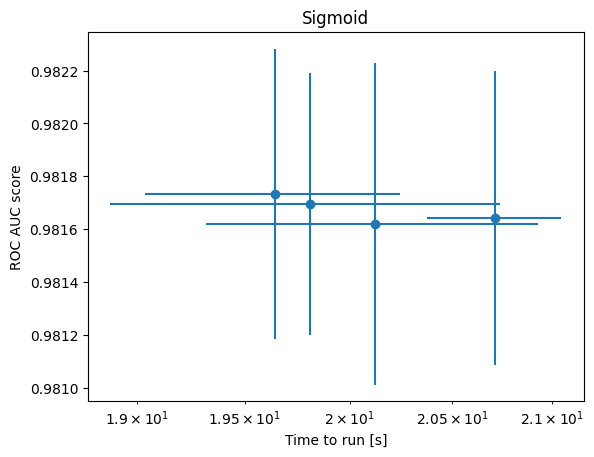

In [34]:
scatterplotWithErrors(x=df_sig['TimeToRun-mean'], y=df_sig["rocAUC-mean"], x_err=df_sig['TimeToRun-std'], y_err=df_sig["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Sigmoid')


In [35]:
df_sig.iloc[:,-13:]#kernel is not RBF! I didn't change it for the sake of time.

,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '1000', '0.01', 'Balanced')",0.981620,0.000608,0.953836,0.008100,0.93104,0.011113,0.000619,0.008492,0.011937,RBF,1000.0,0.01,Balanced
"('RBF', '1000', '0.01', 'None')",0.981734,0.000550,0.959080,0.004620,0.93724,0.007156,0.000560,0.004817,0.007635,RBF,1000.0,0.01,None
"('RBF', '100', '0.01', 'Balanced')",0.981641,0.000555,0.953578,0.007751,0.93068,0.010660,0.000566,0.008129,0.011454,RBF,100.0,0.01,Balanced
"('RBF', '100', '0.01', 'None')",0.981695,0.000497,0.959190,0.003947,0.93752,0.005907,0.000506,0.004114,0.006301,RBF,100.0,0.01,None


In [11]:
df_poly_all = pd.read_csv("hyperParamOpt/jobsOutput/poly/hyperParOptResults2.csv", index_col=0)
df_poly_all = addMeanAndStdDev(df_poly_all)

In [64]:
df_poly = pd.read_csv("hyperParamOpt/jobsOutput/poly/hyperParOptResults2.csv", index_col=0)
df_poly = addMeanAndStdDev(df_poly)

In [67]:
df_poly = df_poly[df_poly['rocAUC-mean']>0.983]

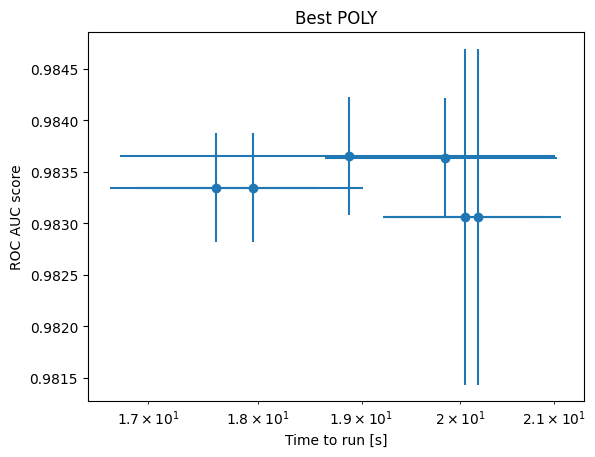

In [68]:
scatterplotWithErrors(x=df_poly['TimeToRun-mean'], y=df_poly["rocAUC-mean"], x_err=df_poly['TimeToRun-std'], y_err=df_poly["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score',title='Best POLY')


In [69]:
#df_poly

In [70]:
df_poly.iloc[:,-13:]#kernel is not RBF! I didn't change it for the sake of time.

,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '10000', '0.1', 'Balanced')",0.983067,0.001631,0.954783,0.007652,0.93244,0.010435,0.001659,0.008014,0.011191,RBF,10000.0,0.1,Balanced
"('RBF', '1000', '0.1', 'Balanced')",0.983348,0.000528,0.954179,0.008553,0.93160,0.011757,0.000537,0.008964,0.012620,RBF,1000.0,0.1,Balanced
"('RBF', '1000', 'auto', 'Balanced')",0.983654,0.000574,0.954280,0.008604,0.93176,0.011804,0.000583,0.009016,0.012668,RBF,1000.0,auto,Balanced
"('RBF', '10', '1', 'Balanced')",0.983066,0.001630,0.954730,0.007594,0.93236,0.010351,0.001658,0.007954,0.011102,RBF,10.0,1,Balanced
"('RBF', '1', '1', 'Balanced')",0.983348,0.000527,0.954179,0.008553,0.93160,0.011757,0.000536,0.008964,0.012620,RBF,1.0,1,Balanced
"('RBF', '1', 'scale', 'Balanced')",0.983636,0.000582,0.954229,0.008518,0.93168,0.011686,0.000592,0.008926,0.012542,RBF,1.0,scale,Balanced


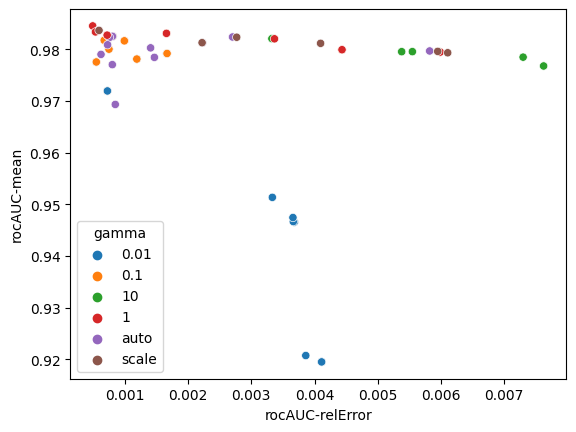

In [26]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="gamma", data=df_poly_test, palette=None, legendOutsideGraph=False)


In [32]:
#df_poly_test[df_poly_test['gamma']=='1'].iloc[:,-13:]

In [33]:
#df_poly_test

In [39]:
decreasingColorDarkness3={10000: "#F8D1CC",
1000: "#EEA8A1",
100: "#E9918C",
10: "#DF6261",
1: "#CF3333",
0.1: "#C92828"}

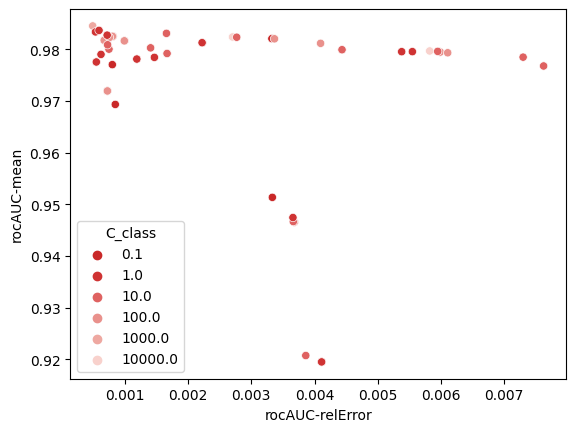

In [40]:

scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df_poly_test, palette=decreasingColorDarkness3, legendOutsideGraph=False)


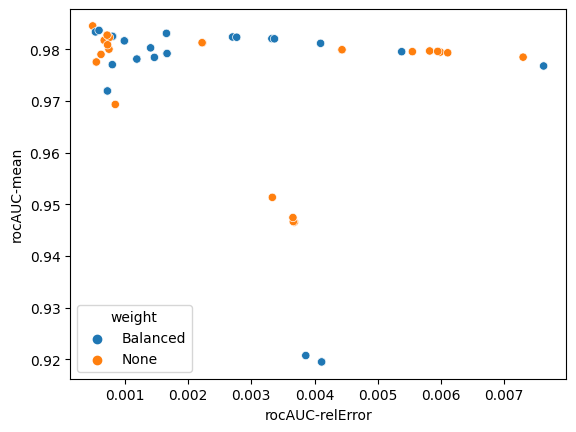

In [46]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="weight", data=df_poly_test, palette=None, legendOutsideGraph=False)


# Quantum Kernel

In [2]:
df_q = pd.read_csv("hyperParamOpt/jobsOutput/quantumKernel/hyperParOptResults2.csv", index_col=0)
df_q = addMeanAndStdDev(df_q, classical=False)

In [3]:
df_q[df_q.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight


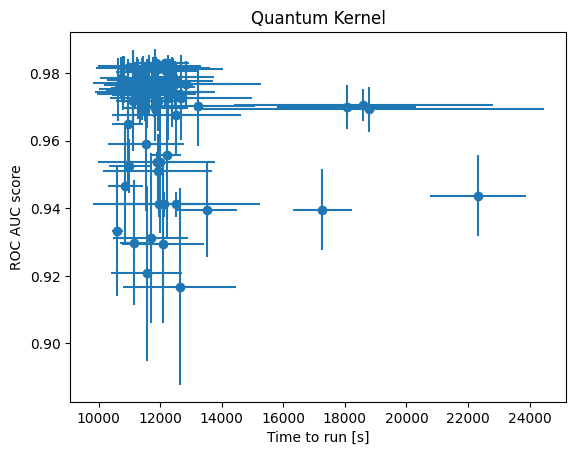

In [4]:
scatterplotWithErrors(x=df_q['TimeToRun-mean'], y=df_q["rocAUC-mean"], x_err=df_q['TimeToRun-std'], y_err=df_q["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Quantum Kernel', xscale='linear')





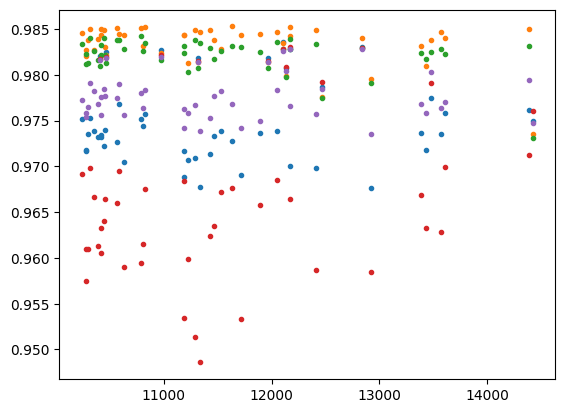

In [5]:
df2 = df_q[(df_q['rocAUC-mean']>0.97) & (df_q['TimeToRun-mean']<13000)]
for i in range(5):
    plt.plot(df2['TimeToRun-fold0'.format(i)],df2['rocAUC-fold{}'.format(i)],'.')

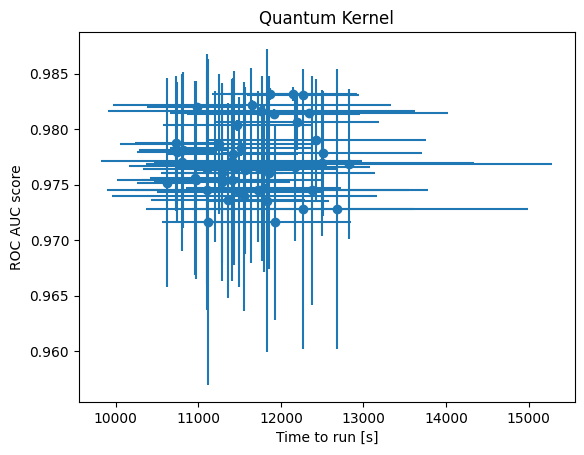

In [6]:
scatterplotWithErrors(x=df2['TimeToRun-mean'], y=df2["rocAUC-mean"], x_err=df2['TimeToRun-std'], y_err=df2["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Quantum Kernel', xscale='linear')


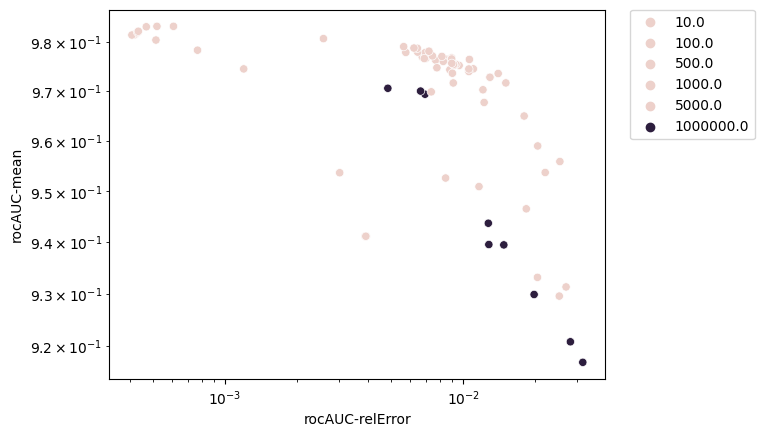

In [9]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_quant", data=df_q, palette=None, legendOutsideGraph=True, loglog=True)


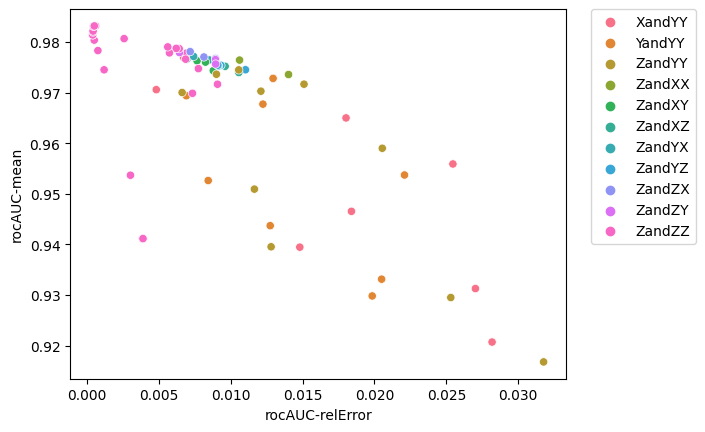

In [10]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="interaction", data=df_q, palette=None, legendOutsideGraph=True, loglog=False)


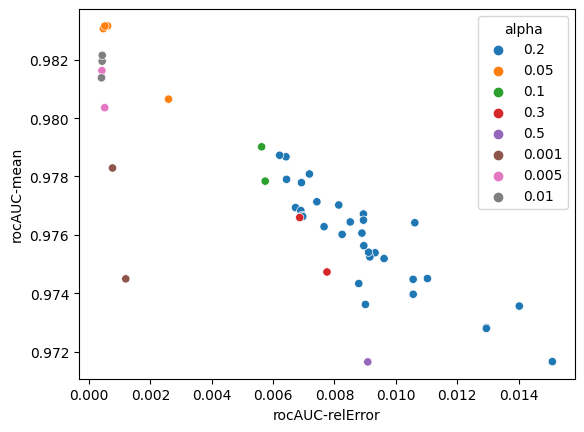

In [11]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="alpha", data=df2, palette=None, legendOutsideGraph=False, loglog=False)


In [50]:
df_q['weight'].unique()

array(['None'], dtype=object)

Can run for 1 fold only and run for all fold of those with score>.955


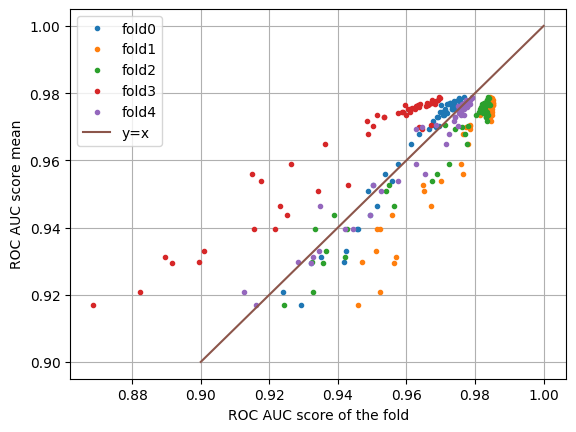

In [7]:
for i in range(5):
    plt.plot(df_q['rocAUC-fold{}'.format(i)],df_q['rocAUC-mean'],'.', label='fold{}'.format(i))
x = np.linspace(0.9, 1, 100)
plt.plot(x,x,'-', label='y=x')
plt.legend()
plt.xlabel('ROC AUC score of the fold')
plt.ylabel('ROC AUC score mean')
plt.grid()
print('Can run for 1 fold only and run for all fold of those with score>.955')

zoomed version


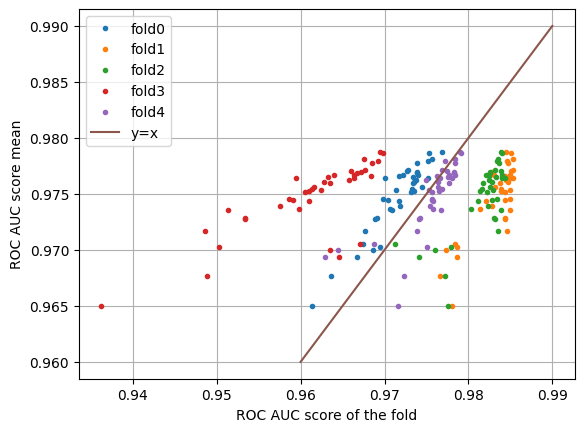

In [8]:
df3 = df_q[df_q['rocAUC-mean']>0.96]
for i in range(5):
    plt.plot(df3['rocAUC-fold{}'.format(i)],df3['rocAUC-mean'],'.', label='fold{}'.format(i))
x = np.linspace(0.96, 0.99, 100)
plt.plot(x,x,'-', label='y=x')
plt.legend()
plt.xlabel('ROC AUC score of the fold')
plt.ylabel('ROC AUC score mean')
plt.grid()
print('zoomed version')

In [16]:
#df_q

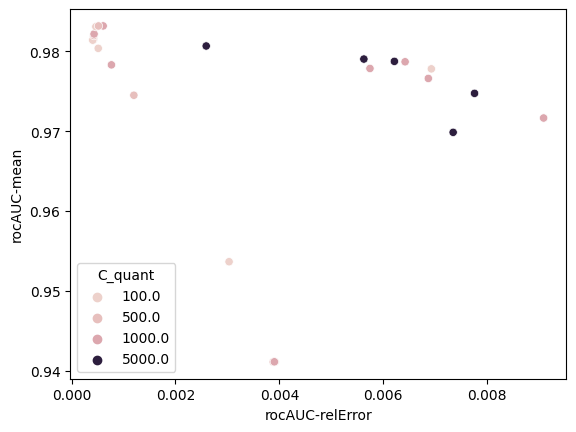

In [13]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_quant", data=df_q[(df_q['C_quant']>10)&(df_q['C_quant']<5001)&(df_q['interaction']=='ZandZZ')], palette=None, legendOutsideGraph=False, loglog=False)


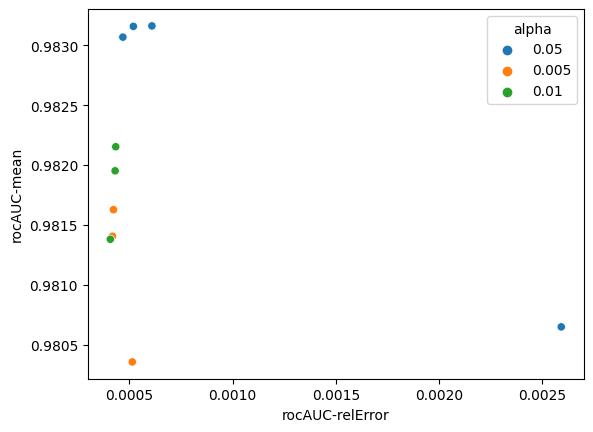

In [24]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="alpha", data=df_q[df_q['rocAUC-mean']>0.98], palette=None, legendOutsideGraph=False, loglog=False)


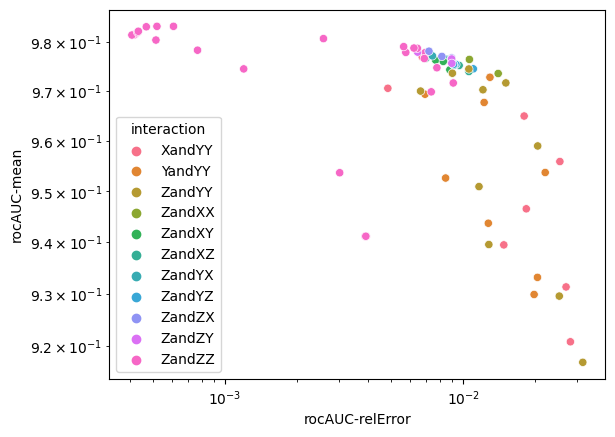

In [15]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="interaction", data=df_q, palette=None, legendOutsideGraph=False, loglog=True)


In [32]:
df_q[df_q['rocAUC-mean']>0.981].iloc[:,-16:].sort_values(by='rocAUC-mean', ascending=False)

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.05', '1000', 'None', 'ZandZZ', 'None')",12142.312427,785.643809,0.983161,0.000598,0.961537,0.005099,0.94092,0.007923,0.000609,0.005303,0.008420,0.05,1000.0,None,ZandZZ,None
"('0.05', '500', 'None', 'ZandZZ', 'None')",11862.971767,699.561432,0.983157,0.000510,0.960976,0.004812,0.94008,0.007473,0.000519,0.005008,0.007950,0.05,500.0,None,ZandZZ,None
"('0.05', '100', 'None', 'ZandZZ', 'None')",12267.144194,679.728307,0.983067,0.000460,0.961082,0.003688,0.94036,0.005451,0.000468,0.003838,0.005796,0.05,100.0,None,ZandZZ,None
"('0.01', '1000', 'None', 'ZandZZ', 'None')",11650.955439,1679.493942,0.982153,0.000426,0.959536,0.004660,0.93796,0.007282,0.000433,0.004857,0.007764,0.01,1000.0,None,ZandZZ,None
"('0.01', '500', 'None', 'ZandZZ', 'None')",10977.678276,602.100194,0.981952,0.000423,0.959387,0.003829,0.93780,0.005821,0.000430,0.003991,0.006207,0.01,500.0,None,ZandZZ,None
"('0.005', '1000', 'None', 'ZandZZ', 'None')",11763.313087,1861.866892,0.981628,0.000415,0.959194,0.003403,0.93756,0.004979,0.000422,0.003548,0.005310,0.005,1000.0,None,ZandZZ,None
"('0.005', '500', 'None', 'ZandZZ', 'None')",12341.379709,1683.053832,0.981407,0.000410,0.959277,0.003462,0.93780,0.004844,0.000418,0.003609,0.005165,0.005,500.0,None,ZandZZ,None
"('0.01', '100', 'None', 'ZandZZ', 'None')",11912.691864,1046.452455,0.981382,0.000400,0.959043,0.003464,0.93748,0.004810,0.000407,0.003612,0.005130,0.01,100.0,None,ZandZZ,None


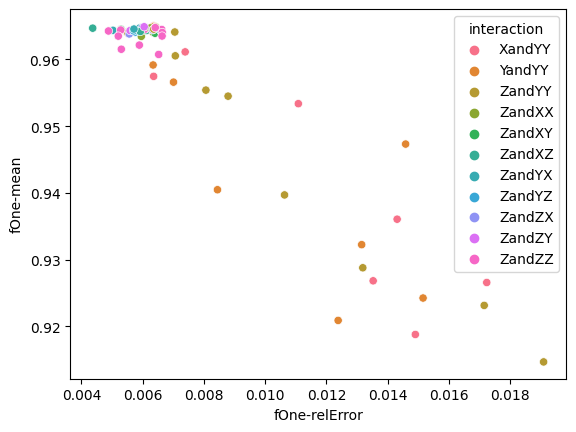

In [18]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="interaction", data=df_q, palette=None, legendOutsideGraph=False)


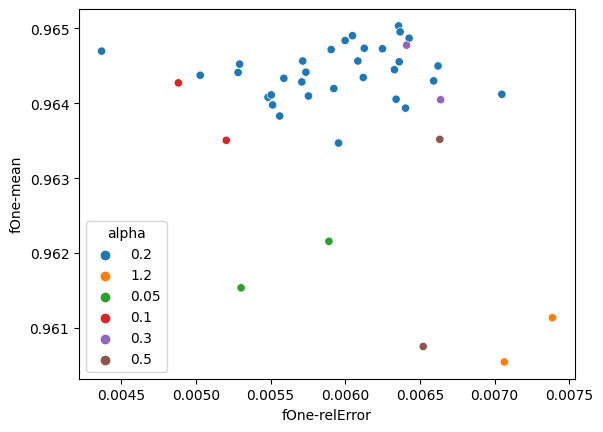

In [23]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="alpha", data=df_q[df_q['fOne-mean']>0.96], palette=None, legendOutsideGraph=False)


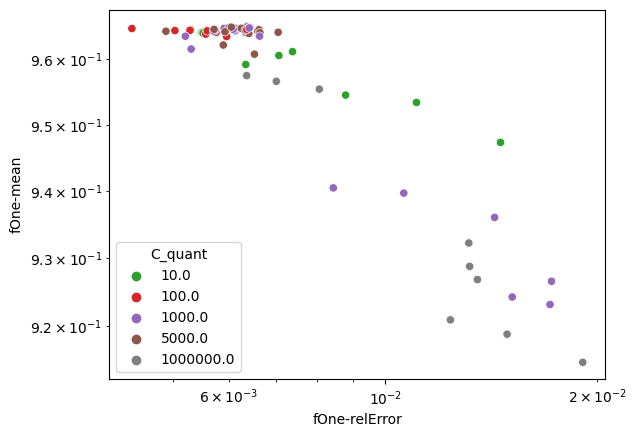

In [20]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="C_quant", data=df_q, palette=multicolors2, legendOutsideGraph=False, loglog=True)


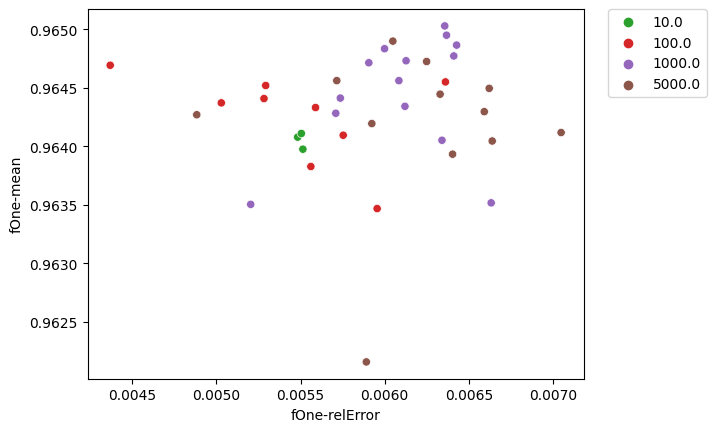

In [18]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="C_quant", data=df_q[df_q['fOne-mean']>0.962], palette=multicolors2, legendOutsideGraph=True)


In [19]:
df_q[df_q['fOne-mean']>0.965].iloc[:,-16:]

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.2', '1000', 'None', 'XandYY', 'None')",12493.164836,1842.483165,0.976934,0.006577,0.96503,0.006135,0.94612,0.009823,0.006732,0.006357,0.010382,0.2,1000.0,None,XandYY,None


In [40]:
col1 = 'rocAUC-mean'
col2 = 'alpha'
df_q[col1]. corr(df_q[col2].astype(float))

-0.8877248494028299